In [1]:
import pandas as pd 
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

#getting the data
df1 = pd.read_csv("new-533_1 (GE).csv")
df2 = pd.read_csv("new-534_1 (GE).csv")
df3 = pd.read_csv("V300032999_L3_HK500PLAvzqEAAIRAAPEI-535_1 (GE).csv")

df4 = pd.read_csv("V300029980_L3_HK500PLAvzqEAAARBAPEI-594_1 (GE).csv")
df5 = pd.read_csv("V300029980_L3_HK500PLAvzqEAABRBAPEI-595_1 (GE).csv")
df6 = pd.read_csv("V300032999_L3_HK500PLAvzqEAACRAAPEI-529_1 (GE).csv")

#slicing the dataframes to get only names and TPM values and setting the name as the index
def slice_and_dice(df,name):
    newdf = df.loc[:,["Name","TPM"]]
    newdf = newdf.set_index("Name")
    newdf.rename(columns={"TPM":name},inplace =True)
    return newdf

ko1 = slice_and_dice(df1,"ko1")
ko2 = slice_and_dice(df2,"ko2")
ko3 = slice_and_dice(df3,"ko3")

wt1 = slice_and_dice(df4,"wt1")
wt2 = slice_and_dice(df5,"wt2")
wt3 = slice_and_dice(df6,"wt3")

print (wt1.head())

               wt1
Name              
OR4F5     0.000000
OR4F29    0.000000
OR4F16    0.000000
SAMD11    6.816732
NOC2L   168.954106


In [5]:

df_dge = pd.read_csv("study vs. control_patz1ko.csv")
print(df_dge.columns)
print(df_dge.shape)
#let's check what happened to ZBTB24 before this :) 
print(df_dge[df_dge["Name"]== "PATZ1"])

#getting only the ones that showed differential gene expression! abs(fold change) >= 2 & FDR < 0.05

df_dge = df_dge.loc[(df_dge["Fold change"] >= 2) | (df_dge["Fold change"] <= -2) ]
df_dge = df_dge.loc[(df_dge["FDR p-value"] < 0.05)]



Index(['Name', 'Chromosome', 'Region', 'Max group mean', 'Log? fold change',
       'Fold change', 'P-value', 'FDR p-value', 'Bonferroni', 'ENSEMBL',
       'Biotype'],
      dtype='object')
(21486, 11)
        Name Chromosome                          Region  Max group mean  \
20298  PATZ1         22  complement(31325804..31346346)        6.013955   

       Log? fold change  Fold change   P-value  FDR p-value  Bonferroni  \
20298          0.425875     1.343387  0.003696     0.065086         1.0   

                                          ENSEMBL         Biotype  
20298  https://www.ensembl.org/id/ENSG00000100105  protein_coding  


In [3]:
#Merging time (inner merge, only those that have 2 of them!) - I hated this code, there should be another way ?
data = pd.merge(wt1, wt2, left_index=True, right_index=True)
data = pd.merge(data,wt3,left_index=True, right_index=True)
temp_data = pd.merge(ko1,ko2,left_index=True, right_index=True)
data = pd.merge(data,temp_data,left_index=True, right_index=True)
data = pd.merge(data,ko3,left_index=True, right_index=True)

df_new = data.merge(df_dge, on="Name")
df_new = df_new.set_index("Name")
print(df_new.columns)
df_new = df_new.iloc[:, 0:6]
print(df_new.columns)
print(df_new)
x,y = df_new.shape
print("Differentially Expressed Gene count is NOW:" + str(x))


Index(['wt1', 'wt2', 'wt3', 'ko1', 'ko2', 'ko3', 'Chromosome', 'Region',
       'Max group mean', 'Log? fold change', 'Fold change', 'P-value',
       'FDR p-value', 'Bonferroni', 'ENSEMBL', 'Biotype'],
      dtype='object')
Index(['wt1', 'wt2', 'wt3', 'ko1', 'ko2', 'ko3'], dtype='object')
                           wt1       wt2       wt3       ko1       ko2  \
Name                                                                     
RSC1A1                6.663958  5.381954  4.033316  1.131869  2.613691   
gene:ENSG00000254553  0.675478  0.386547  0.781818  0.000000  0.087995   
EXO5                  0.387674  0.452943  0.165313  0.780472  1.119475   
MROH7-TTC4            0.304945  0.775214  0.620167  1.394942  1.625686   
TTC22                 0.680381  0.626858  0.789151  0.000000  0.074452   
...                        ...       ...       ...       ...       ...   
SYN1                  0.400967  0.401549  0.417954  0.000000  0.081253   
POF1B                 0.415469  0.624108  0

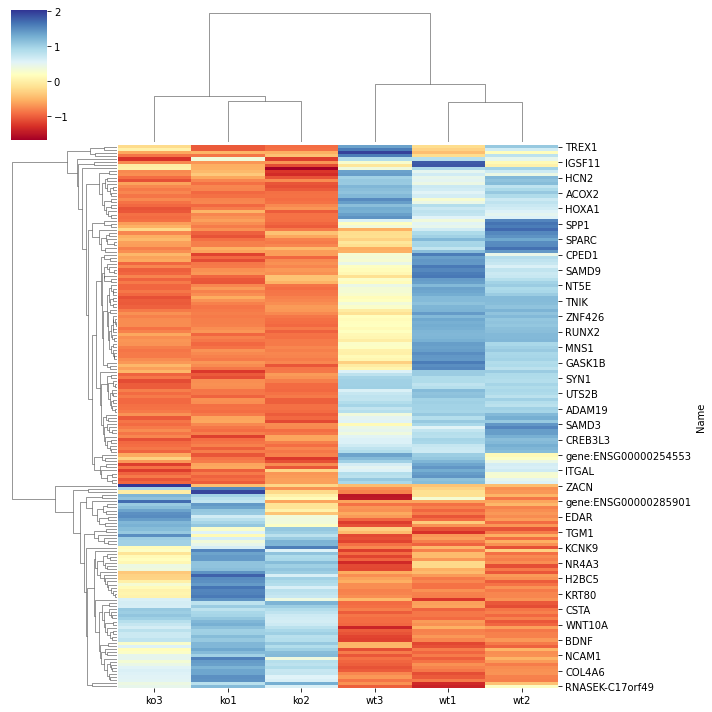

In [4]:
#heatmap_plot = sns.clustermap(df_new, z_score =0,cmap = "RdYlBu",col_cluster=False,yticklabels=True,figsize = (10,30))
heatmap_plot = sns.clustermap(df_new, z_score =0,cmap = "RdYlBu")

#heatmap_plot.figure.savefig("heatmap_PATZ1.jpg",dpi=300)


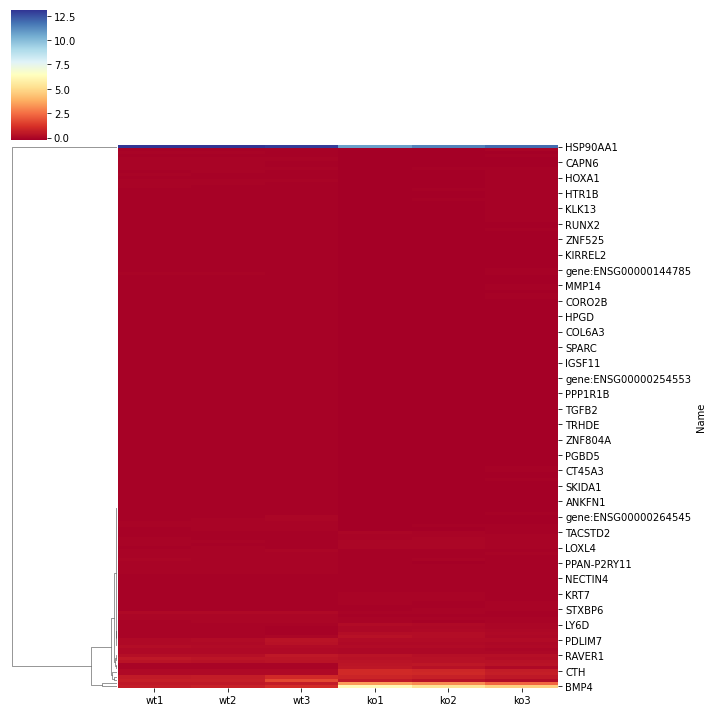

In [14]:
#get rid of an outlier, HSP90AA1
#df_new = df_new.drop("HSP90AA1")

#let's do global z-score scaling ? 
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std


    
# call the z_score function
df_standardized = z_score(df_new)
heatmap_plot_standardized = sns.clustermap(df_standardized,cmap = "RdYlBu",col_cluster=False)
#heatmap_plot_standardized.savefig("heatmap_PATZ1_global.jpg",dpi=300)


In [15]:
#saving
pd.DataFrame(df_new).to_csv("patz1_deg_genes.csv")